In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed Lesley Brewton
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/projct-cereal/cereal.csv


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
  

In [10]:
data = pd.read_csv('/kaggle/input/projct-cereal/cereal.csv')

In [11]:
#explores data about the first 20 cereal brands 
data.head(20)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potassium,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,0.130,10.0,5.0,6,0.280,25,3,1.00,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,0.015,2.0,8.0,8,0.135,0,3,1.00,1.00,33.983679
2,All-Bran,K,C,70,4,1,0.260,9.0,7.0,5,0.320,25,3,1.00,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,0.140,14.0,8.0,0,0.330,25,3,1.00,0.50,93.704912
4,Almond Delight,R,C,110,2,2,0.200,1.0,14.0,8,0.330,25,3,1.00,0.75,34.384843
5,Apple Cinnamon Cheerios,G,C,110,2,2,0.180,1.5,10.5,10,0.070,25,1,1.00,0.75,29.509541
6,Apple Jacks,K,C,110,2,0,0.125,1.0,11.0,14,0.030,25,2,1.00,1.00,33.174094
7,Basic 4,G,C,130,3,2,0.210,2.0,18.0,8,0.100,25,3,1.33,0.75,37.038562
8,Bran Chex,R,C,90,2,1,0.200,4.0,15.0,6,0.125,25,1,1.00,0.67,49.120253
9,Bran Flakes,P,C,90,3,0,0.210,5.0,13.0,5,0.190,25,3,1.00,0.67,53.313813


In [12]:
#Decribes what what this data is about
data.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potassium,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,0.159675,2.151948,14.597403,6.922078,0.100403,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,0.083832,2.383364,4.278956,4.444885,0.075192,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.001000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,0.130000,1.000000,12.000000,3.000000,0.040000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,0.180000,2.000000,14.000000,7.000000,0.090000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,0.210000,3.000000,17.000000,11.000000,0.120000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,0.320000,14.000000,23.000000,15.000000,0.330000,100.000000,3.000000,1.500000,1.500000,93.704912


In [13]:
#list 77 rows and 16 columns
data.shape

(77, 16)

In [14]:
#explores data of the last 5 cereal brands
data.tail()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potassium,vitamins,shelf,weight,cups,rating
72,Triples,G,C,110,2,1,0.25,0.0,21.0,3,0.060,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,0.14,0.0,13.0,12,0.025,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,0.23,3.0,17.0,3,0.115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,0.20,3.0,17.0,3,0.110,25,1,1.0,1.00,51.592193
76,Wheaties Honey Gold,G,C,110,2,1,0.20,1.0,16.0,8,0.060,25,1,1.0,0.75,36.187559


<Axes: >

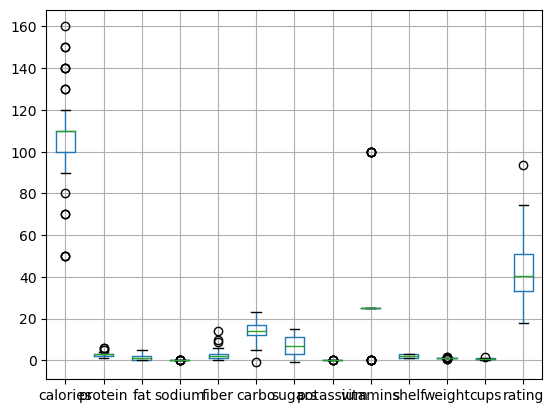

In [15]:
data.boxplot()


array([[<Axes: title={'center': 'calories'}>,
        <Axes: title={'center': 'protein'}>,
        <Axes: title={'center': 'fat'}>,
        <Axes: title={'center': 'sodium'}>],
       [<Axes: title={'center': 'fiber'}>,
        <Axes: title={'center': 'carbo'}>,
        <Axes: title={'center': 'sugars'}>,
        <Axes: title={'center': 'potassium'}>],
       [<Axes: title={'center': 'vitamins'}>,
        <Axes: title={'center': 'shelf'}>,
        <Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'cups'}>],
       [<Axes: title={'center': 'rating'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

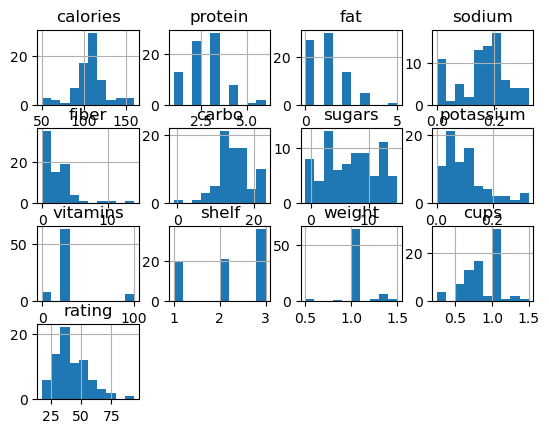

In [16]:
data.hist()

In [47]:
# Count the number of -1 in carbs, sugars, vitamins, sodium and potass column
data[data == -1].count(axis=0)

name         0
mfr          0
type         0
calories     0
protein      0
fat          0
sodium       0
fiber        0
carbo        1
sugars       1
potassium    0
vitamins     0
shelf        0
weight       0
cups         0
rating       0
dtype: int64

In [77]:
#Remove affected rows with values less than 0 in the associated columns
data = data[(data.carbo >= 0) & (data.sugars >= 0)]
data[data == -1].count(axis=0)
#Count occurrences of -1 in each column
count_negative_ones = (data == -1).sum(axis=0)
#Display the counts
print(count_negative_ones)


name         0
mfr          0
type         0
calories     0
protein      0
fat          0
sodium       0
fiber        0
carbo        0
sugars       0
potassium    0
vitamins     0
shelf        0
weight       0
cups         0
rating       0
dtype: int64


In [78]:
# Counting number of manufacturers 
data['mfr'].value_counts()


K    23
G    22
P     9
R     8
Q     7
N     6
A     1
Name: mfr, dtype: int64

<Axes: xlabel='mfr', ylabel='rating'>

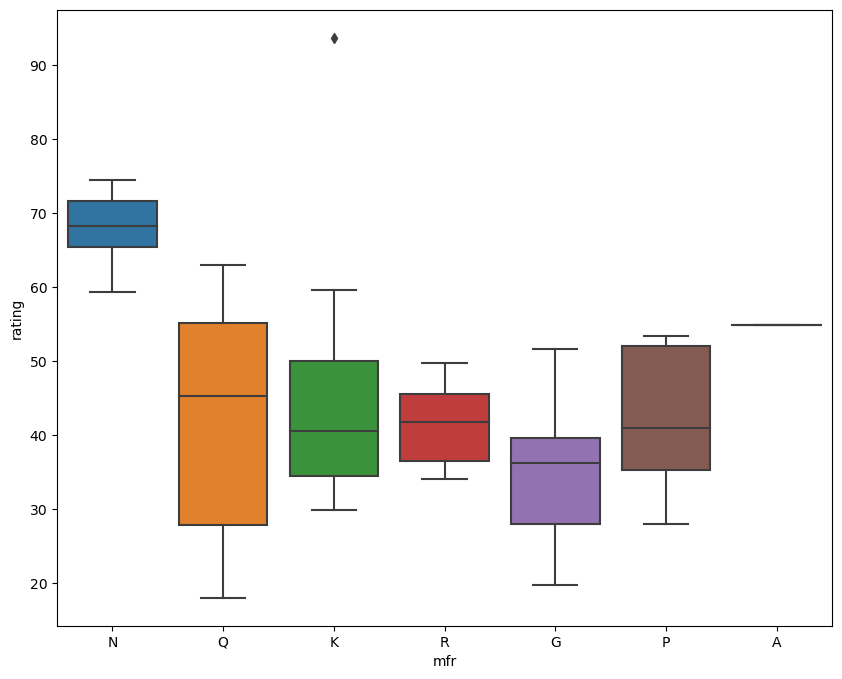

In [79]:
plt.figure(figsize = (10, 8))
sns.boxplot(data = data, x = "mfr", y = "rating")

In [80]:
# Finding out what are the 4 Nabisco cereals that have high ratings
data.loc[data['mfr'] == "N"]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potassium,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,0.130,10.0,5.0,6,0.280,25,3,1.00,0.33,68.402973
20,Cream of Wheat (Quick),N,H,100,3,0,0.080,1.0,21.0,0,0.001,0,2,1.00,1.00,64.533816
63,Shredded Wheat,N,C,80,2,0,0.000,3.0,16.0,0,0.095,0,1,0.83,1.00,68.235885
64,Shredded Wheat 'n'Bran,N,C,90,3,0,0.000,4.0,19.0,0,0.140,0,1,1.00,0.67,74.472949
65,Shredded Wheat spoon size,N,C,90,3,0,0.000,3.0,20.0,0,0.120,0,1,1.00,0.67,72.801787
68,Strawberry Fruit Wheats,N,C,90,2,0,0.015,3.0,15.0,5,0.090,25,2,1.00,1.00,59.363993


In [81]:
# Lowest rating cereal
data.loc[data['rating'] == min(data.rating)]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potassium,vitamins,shelf,weight,cups,rating
10,Cap'n'Crunch,Q,C,120,1,2,0.22,0.0,12.0,12,0.035,25,2,1.0,0.75,18.042851


In [82]:
# Best rating cereal
data.loc[data['rating'] == max(data.rating)]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potassium,vitamins,shelf,weight,cups,rating
3,All-Bran with Extra Fiber,K,C,50,4,0,0.14,14.0,8.0,0,0.33,25,3,1.0,0.5,93.704912


In [83]:
#(hot or cold) affect rating
print(data['type'].value_counts())
data.loc[data['type'] == "H"]

C    74
H     2
Name: type, dtype: int64


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potassium,vitamins,shelf,weight,cups,rating
20,Cream of Wheat (Quick),N,H,100,3,0,0.08,1.0,21.0,0,0.001,0,2,1.0,1.0,64.533816
43,Maypo,A,H,100,4,1,0.00,0.0,16.0,3,0.095,25,2,1.0,1.0,54.850917


Object `ratings` not found.


NameError: name 'Text' is not defined

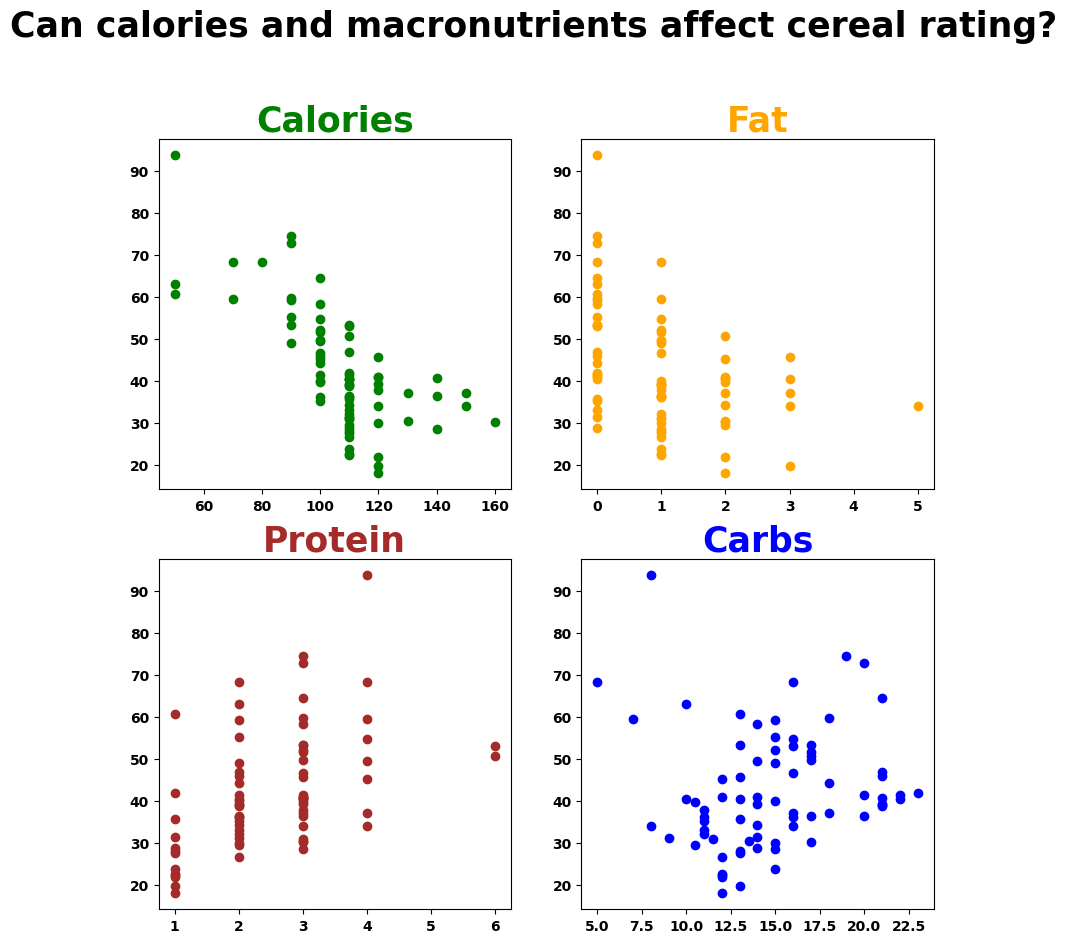

In [92]:
Can macronutrients and calories affect ratings?
fig = plt.figure()

plt.rcParams['figure.figsize'] = [10,10]
plt.rcParams["font.weight"] = "bold"

fontdict={'fontsize': 25,
          'weight' : 'bold'}

fontdicty={'fontsize': 18,
          'weight' : 'bold',
          'verticalalignment': 'baseline',
          'horizontalalignment': 'center'}

fontdictx={'fontsize': 18,
          'weight' : 'bold',
          'horizontalalignment': 'center'}
plt.subplots_adjust(wspace=0.2, hspace=0.2)

fig.suptitle('Can calories and macronutrients affect cereal rating?', fontsize=25,fontweight="bold", color="black", 
             position=(0.5,1.01))

ax1 = fig.add_subplot(221)
ax1.scatter('calories', 'rating', data= data, c="green")
ax1.set_title('Calories', fontdict=fontdict, color="green")


ax2 = fig.add_subplot(222)
ax2.scatter('fat', 'rating', data=data, c="orange")
ax2.set_title('Fat', fontdict=fontdict, color="orange")


ax3 = fig.add_subplot(223)
ax3.scatter('protein', 'rating', data=data, c="brown")
ax3.set_title('Protein', fontdict=fontdict, color="brown")

ax4 = fig.add_subplot(224)
ax4.scatter('carbo', 'rating', data=data, c="blue")
ax4.set_title("Carbs", fontdict=fontdict, color="blue")
Text(0.5,1.0, "Carbs")


NameError: name 'Text' is not defined

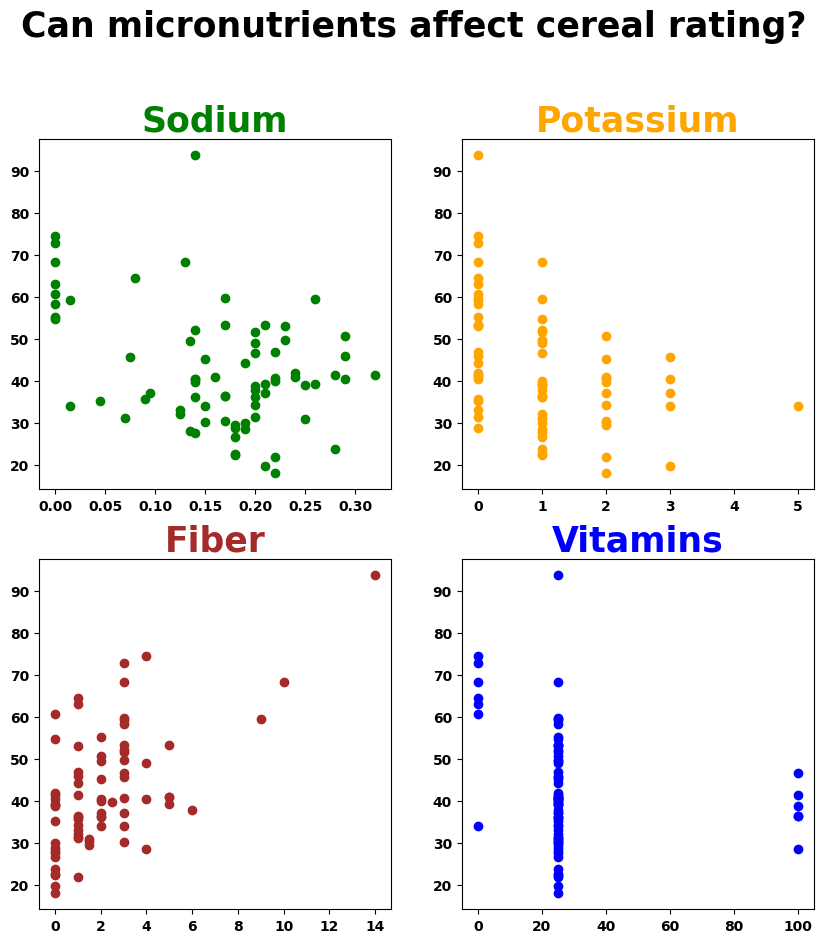

In [93]:
#Can micronutrients affect ratings?
fig = plt.figure()

plt.rcParams['figure.figsize'] = [10,10]
plt.rcParams["font.weight"] = "bold"

fontdict={'fontsize': 25,
          'weight' : 'bold'}

fontdicty={'fontsize': 18,
          'weight' : 'bold',
          'verticalalignment': 'baseline',
          'horizontalalignment': 'center'}

fontdictx={'fontsize': 18,
          'weight' : 'bold',
          'horizontalalignment': 'center'}

plt.subplots_adjust(wspace=0.2, hspace=0.2)

fig.suptitle('Can micronutrients affect cereal rating?', fontsize=25,fontweight="bold", color="black", 
             position=(0.5,1.01))

ax1 = fig.add_subplot(221)
ax1.scatter('sodium', 'rating', data= data, c="green")
ax1.set_title('Sodium', fontdict=fontdict, color="green")


ax2 = fig.add_subplot(222)
ax2.scatter('fat', 'rating', data=data, c="orange")
ax2.set_title('Potassium', fontdict=fontdict, color="orange")

ax3 = fig.add_subplot(223)
ax3.scatter('fiber', 'rating', data=data, c="brown")
ax3.set_title('Fiber', fontdict=fontdict, color="brown")

ax4 = fig.add_subplot(224)
ax4.scatter('vitamins', 'rating', data=data, c="blue")
ax4.set_title("Vitamins", fontdict=fontdict, color="blue")
Text(0.5,1.0,'Vitamins')

NameError: name 'Text' is not defined

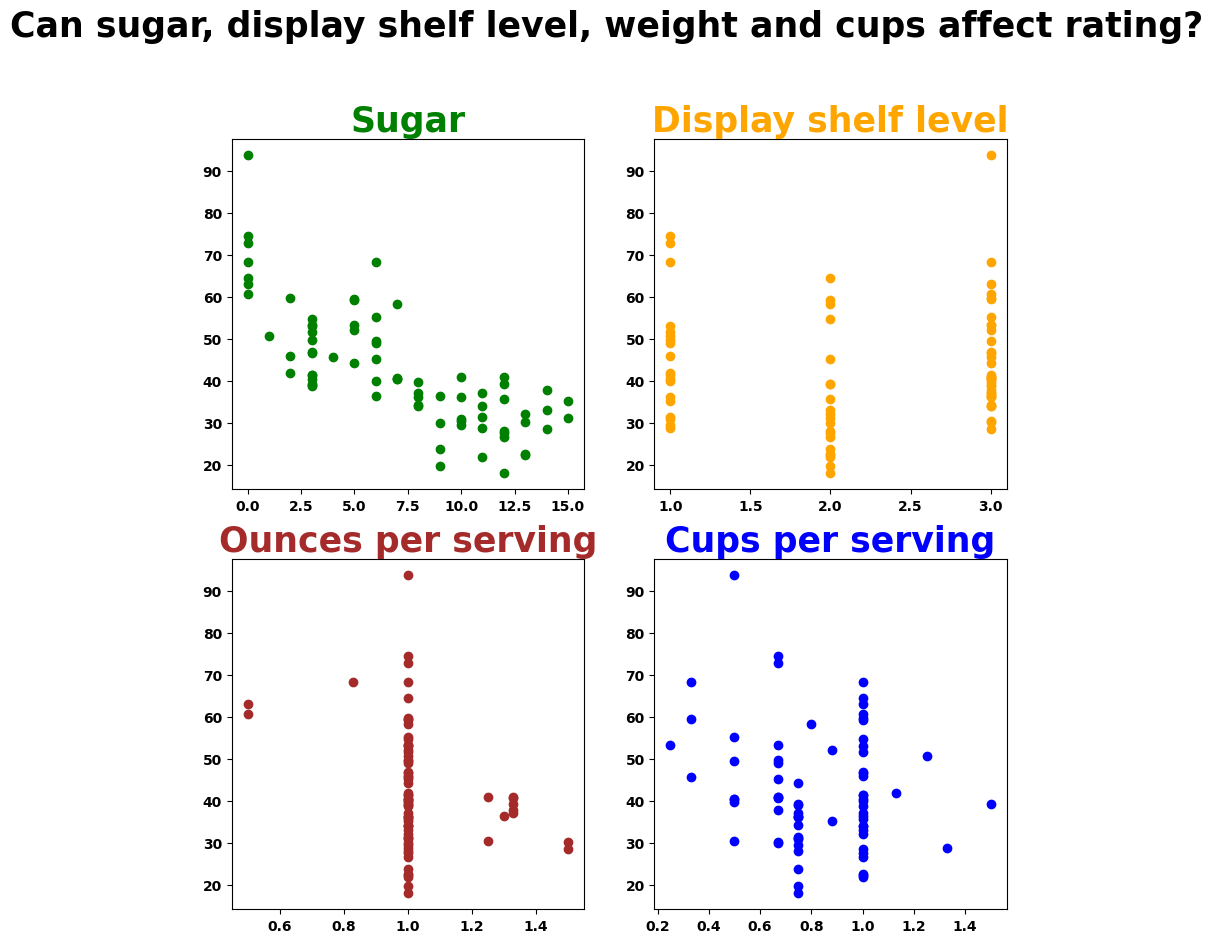

In [86]:
#Can sugar, display shelf level, weight and cups affect ratings?
fig = plt.figure()

plt.rcParams['figure.figsize'] = [10,10]
plt.rcParams["font.weight"] = "bold"

fontdict={'fontsize': 25,
          'weight' : 'bold'}

fontdicty={'fontsize': 18,
          'weight' : 'bold',
          'verticalalignment': 'baseline',
          'horizontalalignment': 'center'}

fontdictx={'fontsize': 18,
          'weight' : 'bold',
          'horizontalalignment': 'center'}

plt.subplots_adjust(wspace=0.2, hspace=0.2)

fig.suptitle('Can sugar, display shelf level, weight and cups affect rating?', fontsize=25,fontweight="bold", color="black", 
             position=(0.5,1.01))

ax1 = fig.add_subplot(221)
ax1.scatter('sugars', 'rating', data= data, c="green")
ax1.set_title('Sugar', fontdict=fontdict, color="green")


ax2 = fig.add_subplot(222)
ax2.scatter('shelf', 'rating', data=data, c="orange")
ax2.set_title('Display shelf level', fontdict=fontdict, color="orange")

ax3 = fig.add_subplot(223)
ax3.scatter('weight', 'rating', data=data, c="brown")
ax3.set_title('Ounces per serving', fontdict=fontdict, color="brown")

ax4 = fig.add_subplot(224)
ax4.scatter('cups', 'rating', data=data, c="blue")
ax4.set_title("Cups per serving", fontdict=fontdict, color="blue")
Text(0.5, 1.0, 'Cups per serving')



In [88]:
#linear regression to predict ratings
# Use label encoder on categorical data
le = LabelEncoder()
 
# Implementing LE on mfr
le.fit(data.mfr.drop_duplicates()) 
data.mfr = le.transform(data.mfr)

# Implementing LE on type
le.fit(data.type.drop_duplicates()) 
data.type = le.transform(data.type)# Use label encoder on categorical data
le = LabelEncoder()
 
# Implementing LE on mfr
le.fit(data.mfr.drop_duplicates()) 
data.mfr = le.transform(data.mfr)

# Implementing LE on type
le.fit(data.type.drop_duplicates()) 
data.type = le.transform(data.type)

/tmp/ipykernel_32/2930656263.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = data.corr()


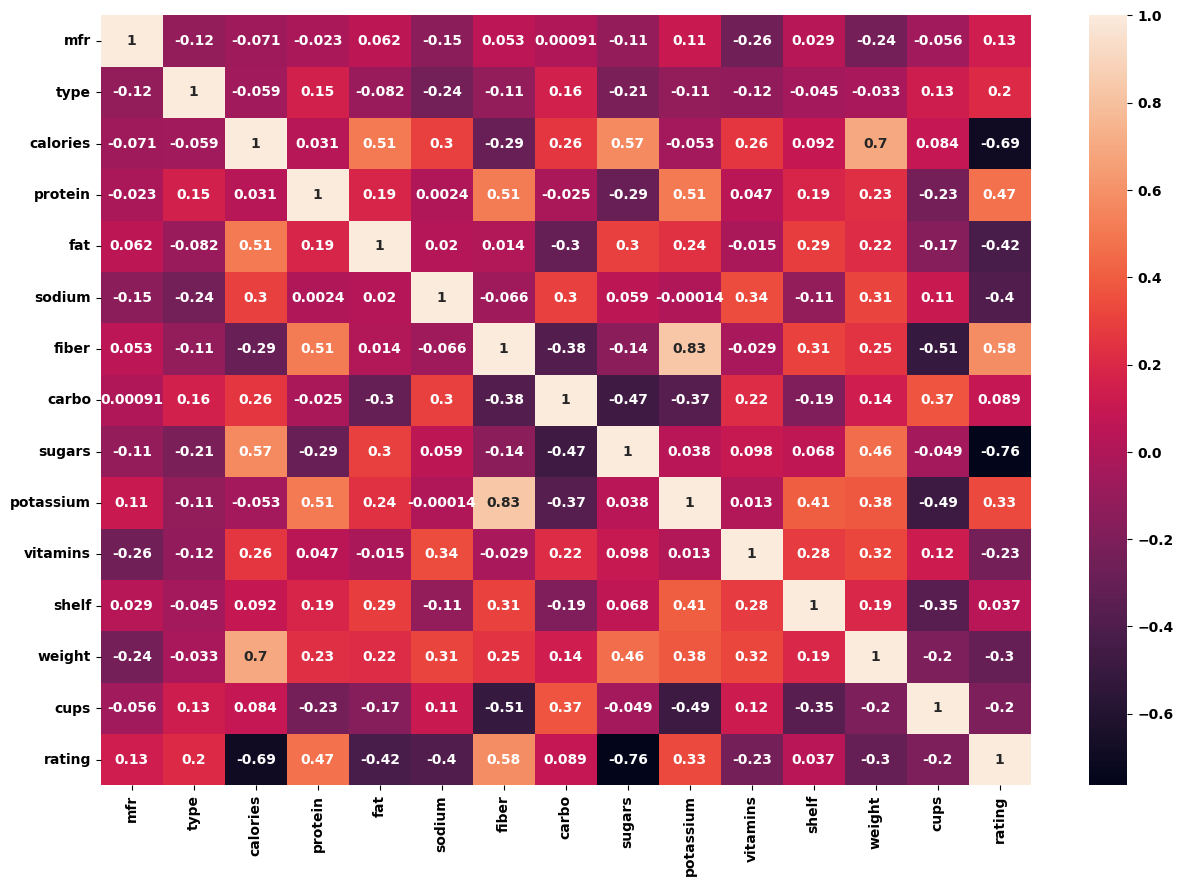

In [89]:
plt.figure(figsize=(15,10))
 
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [90]:
# Creating training and testing dataset
y = data['rating']
X = data.drop(['rating', 'name'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

lr = LinearRegression().fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(lr.score(X_test,y_test))

0.9632543478898296
